In [2]:
##### DOWNLOADING THE FILE #####
import requests
url = "https://assets.openstax.org/oscms-prodcms/media/documents/ConceptsofBiology-WEB.pdf?_gl=1*q17i04*_ga*NTM1NzU5NTk1LjE3MTM2MzYzNTY.*_ga_T746F8B0QC*MTcxMzYzNjM1Ni4xLjEuMTcxMzYzNjU4Mi42MC4wLjA."
response = requests.get(url)
filename = "ConceptsofBiology.pdf"

if response.status_code == 200:
      # Open a file in binary write mode and save the content to it
      with open(filename, "wb") as file:
          file.write(response.content)
      print(f"The file has been downloaded and saved as {filename}")
else:
      print(f"Failed to download the file. Status code: {response.status_code}")

The file has been downloaded and saved as ConceptsofBiology.pdf


In [3]:
!ls

ConceptsofBiology.pdf


In [10]:
!pip install -q torch langchain sentence-transformers faiss-cpu openpyxl PyPDF langchain_community

In [11]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
import matplotlib.pyplot as plt
from langchain_community.document_loaders import PyPDFLoader


In [12]:
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

In [19]:
    ### download embeddings model
embeddings = HuggingFaceInstructEmbeddings(
    model_name = 'sentence-transformers/all-MiniLM-L6-v2',
    model_kwargs = {"device": "cpu"}
    )



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


In [24]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embeddings.embed_query(single_sentence)
print(f"Sentence: {single_sentence}")
len(single_embedding)

Sentence: Yo! How cool are embeddings?


384

In [25]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [26]:
    ### download embeddings model
embeddings_new = HuggingFaceEmbeddings(
    model_name = 'sentence-transformers/all-MiniLM-L6-v2',
    model_kwargs = {"device": "cpu"}
    )

In [29]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding_new = embeddings_new.embed_query(single_sentence)
print(f"Sentence: {single_sentence}")
len(single_embedding_new)

Sentence: Yo! How cool are embeddings?


384

In [30]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")

.gitattributes:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [33]:
single_sentence = "Yo! How cool are embeddings?"
embedding_model_embed = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
#len(single_embedding_new)
print(embedding_model_embed.shape)

Sentence: Yo! How cool are embeddings?
(768,)


In [15]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [16]:

loader = PyPDFLoader('ConceptsofBiology.pdf')

documents = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

texts = text_splitter.split_documents(documents)

print(f'We have created {len(texts)} chunks from {len(documents)} pages')

We have created 2137 chunks from 615 pages


In [40]:
from sentence_transformers import SentenceTransformer
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")
print(f"Model's maximum sequence length: {SentenceTransformer('all-mpnet-base-v2').max_seq_length}")
print(f"Model's maximum sequence length: {SentenceTransformer('all-MiniLM-L6-v2').max_seq_length}")


Model's maximum sequence length: 512
Model's maximum sequence length: 384
Model's maximum sequence length: 256


In [41]:
from transformers import AutoTokenizer

In [42]:
tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [55]:
texts[0].page_content

'Concepts of Biology           SENIOR CONTRIBUTING AUTHORS SAMANTHA FOWLER, CLAYTON STATE UNIVERSITY REBECCA ROUSH, SANDHILLS COMMUNITY COLLEGE JAMES WISE, HAMPTON UNIVERSITY'

In [56]:
lengths = [len(tokenizer.encode(doc.page_content)) for doc in texts]

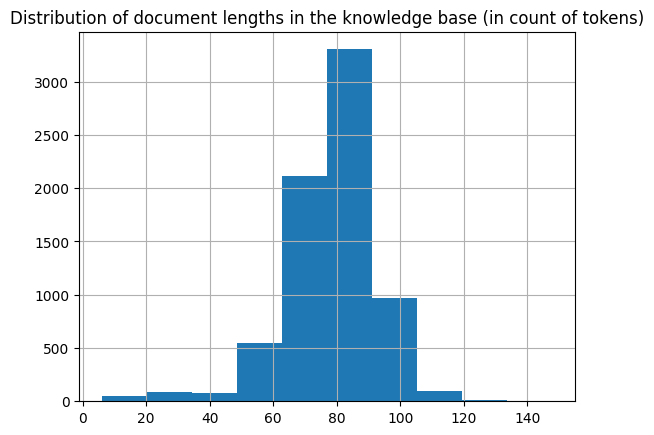

In [59]:
##### Plotting Distribution with chunk size = 300 #####
import pandas as pd
import matplotlib.pyplot as plt
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [61]:
lengths_new = [len(tokenizer.encode(doc.page_content)) for doc in texts]

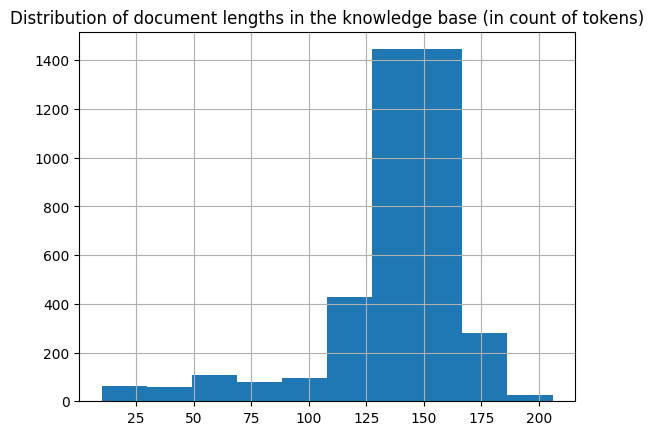

In [62]:
##### Plotting Distribution with chunk size = 500 #####

fig = pd.Series(lengths_new).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

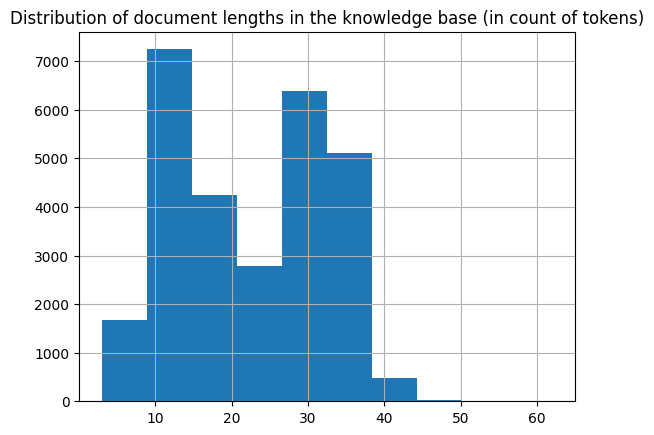

In [64]:
##### Plotting Distribution with chunk size = 100 #####

lengths_100 = [len(tokenizer.encode(doc.page_content)) for doc in texts]
fig = pd.Series(lengths_100).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

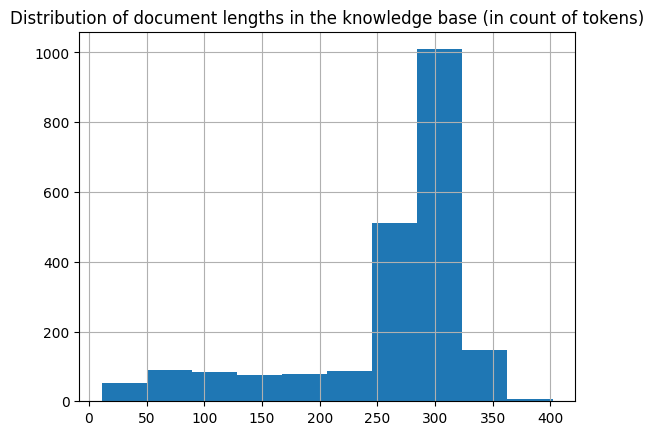

In [66]:
##### Plotting Distribution with chunk size = 1000 #####

lengths_1000 = [len(tokenizer.encode(doc.page_content)) for doc in texts]
fig = pd.Series(lengths_1000).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()